In [1]:
import pandas as pd

In [2]:
# Specify the file path
file_path = "Resources/top_10k_streamed_songs.csv"

# Read the CSV file into a Pandas DataFrame
topStreamedSongs_df = pd.read_csv(file_path)

# Display the DataFrame in table format
display(topStreamedSongs_df.head())

,Position,Artist Name,Song Name,Days,Top 10 (xTimes),Peak Position,Peak Position (xTimes),Peak Streams,Total Streams
0,1,Post Malone,Sunflower SpiderMan: Into the SpiderVerse,1506,302,1,(x29),2118242,883369738
1,2,Juice WRLD,Lucid Dreams,1673,178,1,(x20),2127668,864832399
2,3,Lil Uzi Vert,XO TOUR Llif3,1853,212,1,(x4),1660502,781153024
3,4,J. Cole,No Role Modelz,2547,6,7,0,659366,734857487
4,5,Post Malone,rockstar,1223,186,1,(x124),2905678,718865961


In [3]:
# Specify the file path
file_path = "Resources/lyrics.csv"

# Read the CSV file into a Pandas DataFrame
lyricgenius_df = pd.read_csv(file_path)

# Display the DataFrame in table format
display(lyricgenius_df.head())

,Unnamed: 0,Artist Name,Song Name,Lyrics
0,0,Post Malone,Sunflower SpiderMan: Into the SpiderVerse,"[Swae Lee:]\nAyy, ayy, ayy, ayy (ooh)\nOoh, oo..."
1,1,Juice WRLD,Lucid Dreams,"Enviyon on the mix\nNo, no, no, no\nNo-no, no,..."
2,2,Lil Uzi Vert,XO TOUR Llif3,"Are you alright?\nI'm alright, I'm quite alrig..."
3,3,J. Cole,No Role Modelz,First things first rest in peace Uncle Phil\nF...
4,4,Post Malone,rockstar,"[Post Malone:]\nHahahahaha\nTank God\n\nAyy, I..."


In [4]:
# Merge the two DataFrames using 'Artist Name' and 'Song Name'
merged_df2 = pd.merge(topStreamedSongs_df, lyricgenius_df, on=['Artist Name', 'Song Name'], how='left')

# Display the merged DataFrame
display(merged_df2.head())

,Position,Artist Name,Song Name,Days,Top 10 (xTimes),Peak Position,Peak Position (xTimes),Peak Streams,Total Streams,Unnamed: 0,Lyrics
0,1,Post Malone,Sunflower SpiderMan: Into the SpiderVerse,1506,302,1,(x29),2118242,883369738,0.0,"[Swae Lee:]\nAyy, ayy, ayy, ayy (ooh)\nOoh, oo..."
1,2,Juice WRLD,Lucid Dreams,1673,178,1,(x20),2127668,864832399,1.0,"Enviyon on the mix\nNo, no, no, no\nNo-no, no,..."
2,3,Lil Uzi Vert,XO TOUR Llif3,1853,212,1,(x4),1660502,781153024,2.0,"Are you alright?\nI'm alright, I'm quite alrig..."
3,4,J. Cole,No Role Modelz,2547,6,7,0,659366,734857487,3.0,First things first rest in peace Uncle Phil\nF...
4,5,Post Malone,rockstar,1223,186,1,(x124),2905678,718865961,4.0,"[Post Malone:]\nHahahahaha\nTank God\n\nAyy, I..."


In [5]:
# Merge the two DataFrames using 'Artist Name' and 'Song Name'
merged_df2 = pd.merge(topStreamedSongs_df, lyricgenius_df, on=['Artist Name', 'Song Name'], how='left')

# Define a function to count total words and unique words
def count_words(lyrics):
    if pd.isna(lyrics):
        return 0, 0
    else:
        words = lyrics.split()
        total_words = len(words)
        unique_words = len(set(words))
        return total_words, unique_words

# Apply the function to create new columns
merged_df2[['Total Words', 'Unique Words']] = merged_df2['Lyrics'].apply(count_words).apply(pd.Series)

# Display the modified DataFrame
display(merged_df2.head())

,Position,Artist Name,Song Name,Days,Top 10 (xTimes),Peak Position,Peak Position (xTimes),Peak Streams,Total Streams,Unnamed: 0,Lyrics,Total Words,Unique Words
0,1,Post Malone,Sunflower SpiderMan: Into the SpiderVerse,1506,302,1,(x29),2118242,883369738,0.0,"[Swae Lee:]\nAyy, ayy, ayy, ayy (ooh)\nOoh, oo...",301,147
1,2,Juice WRLD,Lucid Dreams,1673,178,1,(x20),2127668,864832399,1.0,"Enviyon on the mix\nNo, no, no, no\nNo-no, no,...",589,142
2,3,Lil Uzi Vert,XO TOUR Llif3,1853,212,1,(x4),1660502,781153024,2.0,"Are you alright?\nI'm alright, I'm quite alrig...",478,198
3,4,J. Cole,No Role Modelz,2547,6,7,0,659366,734857487,3.0,First things first rest in peace Uncle Phil\nF...,582,294
4,5,Post Malone,rockstar,1223,186,1,(x124),2905678,718865961,4.0,"[Post Malone:]\nHahahahaha\nTank God\n\nAyy, I...",490,226


In [6]:
# Reason for 1 Total Words
filtered_df1 = merged_df2[merged_df2['Total Words'] <= 1]
# Display the modified DataFrame
display(filtered_df1.head())

,Position,Artist Name,Song Name,Days,Top 10 (xTimes),Peak Position,Peak Position (xTimes),Peak Streams,Total Streams,Unnamed: 0,Lyrics,Total Words,Unique Words
6,7,The Weeknd,Blinding Lights,1100,233,1,(x11),2355059,644287953,6.0,0,1,1
7,7,The Weeknd,Blinding Lights,1100,233,1,(x11),2355059,644287953,7616.0,0,1,1
14,14,Lil Baby,Drip Too Hard (Lil Baby & Gunna),1453,122,1,(x6),1759294,583443174,13.0,0,1,1
29,29,Offset,Ric Flair Drip (& Metro Boomin),1065,86,4,0,1040394,427614856,28.0,0,1,1
35,35,The Neighbourhood,Sweater Weather,1050,0,12,0,671844,400804036,34.0,0,1,1


In [7]:
# Define a function to count total words and unique words
def count_words(lyrics):
    if pd.isna(lyrics) or lyrics == "0":
        return 0, 0
    else:
        words = lyrics.split()
        total_words = len(words)
        unique_words = len(set(words))
        return total_words, unique_words

# Apply the function to create new columns
merged_df2[['Total Words', 'Unique Words']] = merged_df2['Lyrics'].apply(count_words).apply(pd.Series)

# Display the modified DataFrame
display(merged_df2.head())

,Position,Artist Name,Song Name,Days,Top 10 (xTimes),Peak Position,Peak Position (xTimes),Peak Streams,Total Streams,Unnamed: 0,Lyrics,Total Words,Unique Words
0,1,Post Malone,Sunflower SpiderMan: Into the SpiderVerse,1506,302,1,(x29),2118242,883369738,0.0,"[Swae Lee:]\nAyy, ayy, ayy, ayy (ooh)\nOoh, oo...",301,147
1,2,Juice WRLD,Lucid Dreams,1673,178,1,(x20),2127668,864832399,1.0,"Enviyon on the mix\nNo, no, no, no\nNo-no, no,...",589,142
2,3,Lil Uzi Vert,XO TOUR Llif3,1853,212,1,(x4),1660502,781153024,2.0,"Are you alright?\nI'm alright, I'm quite alrig...",478,198
3,4,J. Cole,No Role Modelz,2547,6,7,0,659366,734857487,3.0,First things first rest in peace Uncle Phil\nF...,582,294
4,5,Post Malone,rockstar,1223,186,1,(x124),2905678,718865961,4.0,"[Post Malone:]\nHahahahaha\nTank God\n\nAyy, I...",490,226


In [8]:
# Reason for 1 Total Words
filtered_df1 = merged_df2[merged_df2['Total Words'] <= 1]
# Display the modified DataFrame
display(filtered_df1.head())

,Position,Artist Name,Song Name,Days,Top 10 (xTimes),Peak Position,Peak Position (xTimes),Peak Streams,Total Streams,Unnamed: 0,Lyrics,Total Words,Unique Words
6,7,The Weeknd,Blinding Lights,1100,233,1,(x11),2355059,644287953,6.0,0,0,0
7,7,The Weeknd,Blinding Lights,1100,233,1,(x11),2355059,644287953,7616.0,0,0,0
14,14,Lil Baby,Drip Too Hard (Lil Baby & Gunna),1453,122,1,(x6),1759294,583443174,13.0,0,0,0
29,29,Offset,Ric Flair Drip (& Metro Boomin),1065,86,4,0,1040394,427614856,28.0,0,0,0
35,35,The Neighbourhood,Sweater Weather,1050,0,12,0,671844,400804036,34.0,0,0,0


In [9]:
import numpy as np
from scipy import stats

# Calculate mean
mean_total_words = merged_df2['Total Words'].mean()

# Calculate median
median_total_words = merged_df2['Total Words'].median()

# Calculate mode
mode_result = stats.mode(merged_df2['Total Words'])
mode_total_words = mode_result.mode.item()  # Extract the mode from the result

# Calculate variance
variance_total_words = np.var(merged_df2['Total Words'], ddof=1)

# Calculate standard deviation
std_deviation_total_words = np.std(merged_df2['Total Words'], ddof=1)

# Display the results
print(f"Mean: {mean_total_words}")
print(f"Median: {median_total_words}")
print(f"Mode: {mode_total_words}")
print(f"Variance: {variance_total_words}")
print(f"Standard Deviation: {std_deviation_total_words}")

Mean: 335.8233690873923
Median: 332.0
Mode: 0
Variance: 67599.5937877889
Standard Deviation: 259.99921882149744


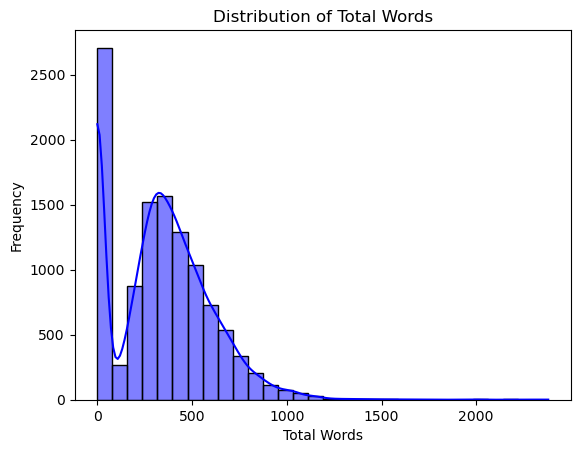

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the histogram
sns.histplot(merged_df2['Total Words'], kde=True, color='blue', bins=30)

# Add a title and labels
plt.title('Distribution of Total Words')
plt.xlabel('Total Words')
plt.ylabel('Frequency')

# Display the bell curve (normal distribution)
plt.show()

In [11]:
# Filter the DataFrame to include only rows where 'Peak Position' is 10 or less
filtered_df = merged_df2[merged_df2['Peak Position'] <= 10]

# Calculate mean
mean_total_words = filtered_df['Total Words'].mean()

# Calculate median
median_total_words = filtered_df['Total Words'].median()

# Calculate mode
mode_result = stats.mode(filtered_df['Total Words'])
mode_total_words = mode_result.mode.item()  # Extract the mode from the result

# Calculate variance
variance_total_words = np.var(filtered_df['Total Words'], ddof=1)

# Calculate standard deviation
std_deviation_total_words = np.std(filtered_df['Total Words'], ddof=1)

# Display the results
print(f"Mean: {mean_total_words}")
print(f"Median: {median_total_words}")
print(f"Mode: {mode_total_words}")
print(f"Variance: {variance_total_words}")
print(f"Standard Deviation: {std_deviation_total_words}")

Mean: 366.2063615205586
Median: 377.0
Mode: 0
Variance: 75441.62974210842
Standard Deviation: 274.66639718412665


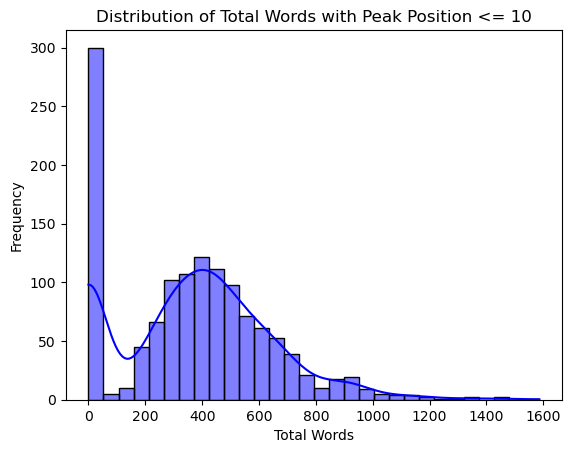

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter the DataFrame to include only rows where 'Peak Position' is 10 or less
filtered_df = merged_df2[merged_df2['Peak Position'] <= 10]

# Create a histogram to visualize the distribution
sns.histplot(filtered_df['Total Words'], kde=True, color='blue', bins=30)

# Add labels and title
plt.title('Distribution of Total Words with Peak Position <= 10')
plt.xlabel('Total Words')
plt.ylabel('Frequency')

# Show the plot
plt.show()

In [13]:
import numpy as np
from scipy import stats

# Calculate mean
mean_total_words = merged_df2['Unique Words'].mean()

# Calculate median
median_total_words = merged_df2['Unique Words'].median()

# Calculate mode
mode_result = stats.mode(merged_df2['Unique Words'])
mode_total_words = mode_result.mode.item()  # Extract the mode from the result

# Calculate variance
variance_total_words = np.var(merged_df2['Unique Words'], ddof=1)

# Calculate standard deviation
std_deviation_total_words = np.std(merged_df2['Unique Words'], ddof=1)

# Display the results
print(f"Mean: {mean_total_words}")
print(f"Median: {median_total_words}")
print(f"Mode: {mode_total_words}")
print(f"Variance: {variance_total_words}")
print(f"Standard Deviation: {std_deviation_total_words}")

Mean: 135.8066643221382
Median: 123.0
Mode: 0
Variance: 12301.276871084097
Standard Deviation: 110.91112149412292


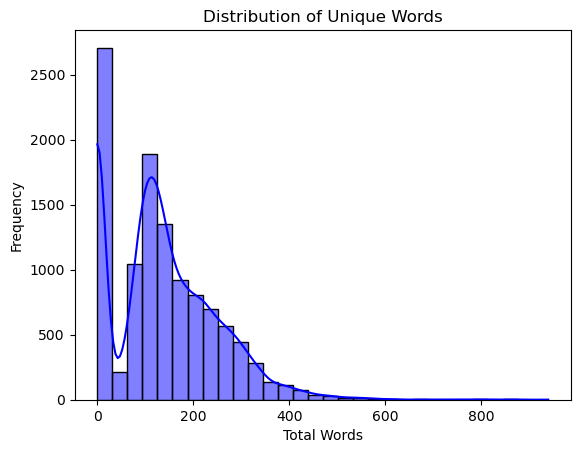

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the histogram
sns.histplot(merged_df2['Unique Words'], kde=True, color='blue', bins=30)

# Add a title and labels
plt.title('Distribution of Unique Words')
plt.xlabel('Total Words')
plt.ylabel('Frequency')

# Display the bell curve (normal distribution)
plt.show()

In [15]:
# Filter the DataFrame to include only rows where 'Peak Position' is 10 or less
filtered_df = merged_df2[merged_df2['Peak Position'] <= 10]

# Calculate mean
mean_total_words = filtered_df['Unique Words'].mean()

# Calculate median
median_total_words = filtered_df['Unique Words'].median()

# Calculate mode
mode_result = stats.mode(filtered_df['Unique Words'])
mode_total_words = mode_result.mode.item()  # Extract the mode from the result

# Calculate variance
variance_total_words = np.var(filtered_df['Unique Words'], ddof=1)

# Calculate standard deviation
std_deviation_total_words = np.std(filtered_df['Unique Words'], ddof=1)

# Display the results
print(f"Mean: {mean_total_words}")
print(f"Median: {median_total_words}")
print(f"Mode: {mode_total_words}")
print(f"Variance: {variance_total_words}")
print(f"Standard Deviation: {std_deviation_total_words}")

Mean: 148.58494957331266
Median: 139.0
Mode: 0
Variance: 13549.41533231497
Standard Deviation: 116.40195587839136


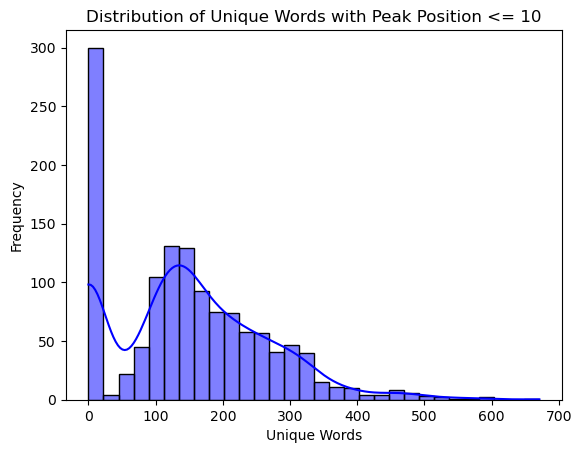

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter the DataFrame to include only rows where 'Peak Position' is 10 or less
filtered_df = merged_df2[merged_df2['Peak Position'] <= 10]

# Create a histogram to visualize the distribution
sns.histplot(filtered_df['Unique Words'], kde=True, color='blue', bins=30)

# Add labels and title
plt.title('Distribution of Unique Words with Peak Position <= 10')
plt.xlabel('Unique Words')
plt.ylabel('Frequency')

# Show the plot
plt.show()

R-squared value: 0.0004292240887366414
Chi-square statistic: 617884.1133958836
P-value: 5.880560354642098e-46


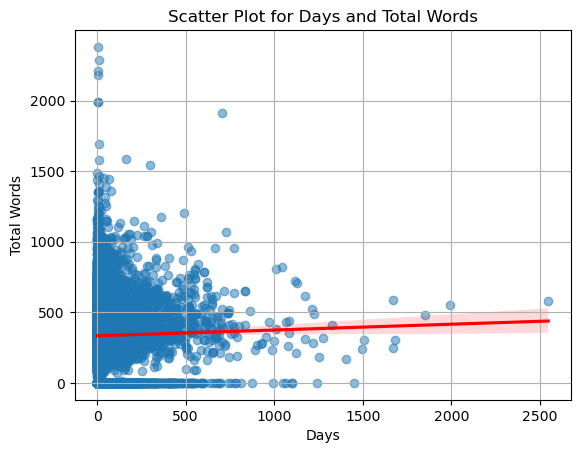

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# Scatter plot for "Days" and "Total Words"
sns.regplot(x='Days', y='Total Words', data=merged_df2, scatter_kws={'alpha':0.5}, line_kws={'color': 'red'})
plt.title('Scatter Plot for Days and Total Words')
plt.xlabel('Days')
plt.ylabel('Total Words')
plt.grid(True)

# Calculate R-squared
correlation_coefficient = merged_df2['Days'].corr(merged_df2['Total Words'])
r_squared = correlation_coefficient ** 2
print(f'R-squared value: {r_squared}')

# Perform Chi-square test for independence
chi2, p, _, _ = stats.chi2_contingency(pd.crosstab(merged_df2['Days'], merged_df2['Total Words']))
print(f'Chi-square statistic: {chi2}')
print(f'P-value: {p}')

# Show the plot
plt.show()

R-squared value: 1.2592746293890053e-05
Chi-square statistic: 297160.1737301599
P-value: 1.0


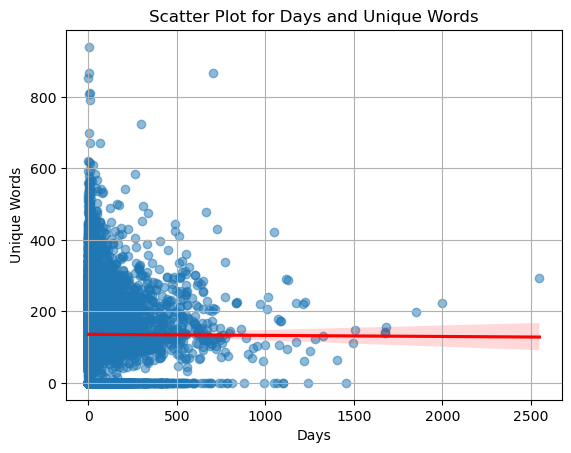

In [18]:
import matplotlib.pyplot as plt

# Scatter plot for "Days" and "Total Words"
sns.regplot(x='Days', y='Unique Words', data=merged_df2, scatter_kws={'alpha':0.5}, line_kws={'color': 'red'})
plt.title('Scatter Plot for Days and Unique Words')
plt.xlabel('Days')
plt.ylabel('Unique Words')
plt.grid(True)

# Calculate R-squared
correlation_coefficient = merged_df2['Days'].corr(merged_df2['Unique Words'])
r_squared = correlation_coefficient ** 2
print(f'R-squared value: {r_squared}')

# Perform Chi-square test for independence
chi2, p, _, _ = stats.chi2_contingency(pd.crosstab(merged_df2['Days'], merged_df2['Unique Words']))
print(f'Chi-square statistic: {chi2}')
print(f'P-value: {p}')

# Show the plot
plt.show()

R-squared value: 0.000517761013284143
Chi-square statistic: 11417778.615857622
P-value: 0.0


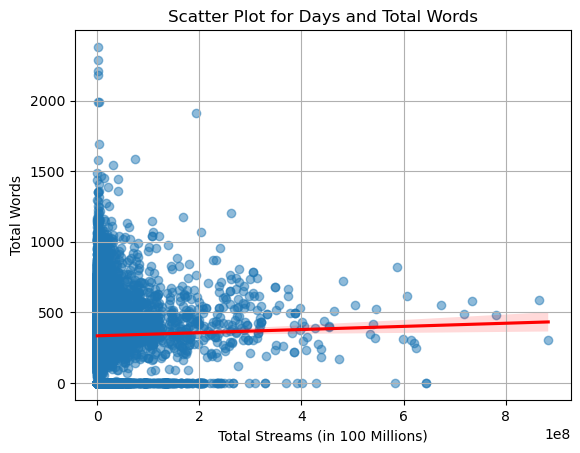

In [19]:
import matplotlib.pyplot as plt

# Scatter plot for "Days" and "Total Words"
sns.regplot(x='Total Streams', y='Total Words', data=merged_df2, scatter_kws={'alpha':0.5}, line_kws={'color': 'red'})
plt.title('Scatter Plot for Days and Total Words')
plt.xlabel('Total Streams (in 100 Millions)')
plt.ylabel('Total Words')
plt.grid(True)

# Calculate R-squared
correlation_coefficient = merged_df2['Total Streams'].corr(merged_df2['Total Words'])
r_squared = correlation_coefficient ** 2
print(f'R-squared value: {r_squared}')

# Perform Chi-square test for independence
chi2, p, _, _ = stats.chi2_contingency(pd.crosstab(merged_df2['Total Streams'], merged_df2['Total Words']))
print(f'Chi-square statistic: {chi2}')
print(f'P-value: {p}')

# Show the plot
plt.show()

R-squared value: 1.2191109737903496e-05
Chi-square statistic: 5796506.008547383
P-value: 0.0


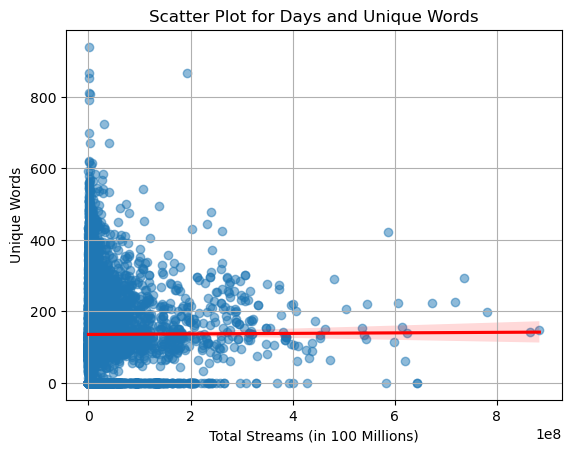

In [20]:
import matplotlib.pyplot as plt

# Scatter plot for "Days" and "Total Words"
sns.regplot(x='Total Streams', y='Unique Words', data=merged_df2, scatter_kws={'alpha':0.5}, line_kws={'color': 'red'})
plt.title('Scatter Plot for Days and Unique Words')
plt.xlabel('Total Streams (in 100 Millions)')
plt.ylabel('Unique Words')
plt.grid(True)

# Calculate R-squared
correlation_coefficient = merged_df2['Total Streams'].corr(merged_df2['Unique Words'])
r_squared = correlation_coefficient ** 2
print(f'R-squared value: {r_squared}')

# Perform Chi-square test for independence
chi2, p, _, _ = stats.chi2_contingency(pd.crosstab(merged_df2['Total Streams'], merged_df2['Unique Words']))
print(f'Chi-square statistic: {chi2}')
print(f'P-value: {p}')

# Show the plot
plt.show()

In [21]:
# Group by 'Artist Name' and calculate the sum of 'Total Streams' for each artist
artist_total_streams = topStreamedSongs_df.groupby('Artist Name')['Total Streams'].sum().reset_index()

# Merge the total streams back into the original DataFrame
topStreamedSongs_df = pd.merge(topStreamedSongs_df, artist_total_streams, on='Artist Name', how='left')

# Rename the new column
topStreamedSongs_df = topStreamedSongs_df.rename(columns={'Total Streams_x': 'Total Streams', 'Total Streams_y': 'Artist Total Streams'})

# Display the updated DataFrame
display(topStreamedSongs_df.head())

,Position,Artist Name,Song Name,Days,Top 10 (xTimes),Peak Position,Peak Position (xTimes),Peak Streams,Total Streams,Artist Total Streams
0,1,Post Malone,Sunflower SpiderMan: Into the SpiderVerse,1506,302,1,(x29),2118242,883369738,7400199432
1,2,Juice WRLD,Lucid Dreams,1673,178,1,(x20),2127668,864832399,4857996474
2,3,Lil Uzi Vert,XO TOUR Llif3,1853,212,1,(x4),1660502,781153024,2915127161
3,4,J. Cole,No Role Modelz,2547,6,7,0,659366,734857487,2663931014
4,5,Post Malone,rockstar,1223,186,1,(x124),2905678,718865961,7400199432


In [22]:
# Group by 'Artist Name' and find the maximum 'Peak Position' for each artist
artist_peak_position = topStreamedSongs_df.groupby('Artist Name')['Peak Position'].min().reset_index()

# Merge the highest peak position back into the original DataFrame
topStreamedSongs_df = pd.merge(topStreamedSongs_df, artist_peak_position, on='Artist Name', how='left')

# Rename the new column
topStreamedSongs_df = topStreamedSongs_df.rename(columns={'Peak Position_x': 'Peak Position', 'Peak Position_y': 'Artist Highest Peak Position'})

# Display the updated DataFrame
display(topStreamedSongs_df.head())

,Position,Artist Name,Song Name,Days,Top 10 (xTimes),Peak Position,Peak Position (xTimes),Peak Streams,Total Streams,Artist Total Streams,Artist Highest Peak Position
0,1,Post Malone,Sunflower SpiderMan: Into the SpiderVerse,1506,302,1,(x29),2118242,883369738,7400199432,1
1,2,Juice WRLD,Lucid Dreams,1673,178,1,(x20),2127668,864832399,4857996474,1
2,3,Lil Uzi Vert,XO TOUR Llif3,1853,212,1,(x4),1660502,781153024,2915127161,1
3,4,J. Cole,No Role Modelz,2547,6,7,0,659366,734857487,2663931014,1
4,5,Post Malone,rockstar,1223,186,1,(x124),2905678,718865961,7400199432,1


In [23]:
# Group by 'Artist Name' and calculate the average 'Peak Position' for each artist
artist_avg_peak_position = topStreamedSongs_df.groupby('Artist Name')['Peak Position'].mean().reset_index()

# Merge the average peak position back into the original DataFrame
topStreamedSongs_df = pd.merge(topStreamedSongs_df, artist_avg_peak_position, on='Artist Name', how='left')

# Rename the new column
topStreamedSongs_df = topStreamedSongs_df.rename(columns={'Peak Position_x': 'Peak Position', 'Peak Position_y': 'Average Peak Position of Songs'})

# Display the updated DataFrame
display(topStreamedSongs_df.head())

,Position,Artist Name,Song Name,Days,Top 10 (xTimes),Peak Position,Peak Position (xTimes),Peak Streams,Total Streams,Artist Total Streams,Artist Highest Peak Position,Average Peak Position of Songs
0,1,Post Malone,Sunflower SpiderMan: Into the SpiderVerse,1506,302,1,(x29),2118242,883369738,7400199432,1,29.971014
1,2,Juice WRLD,Lucid Dreams,1673,178,1,(x20),2127668,864832399,4857996474,1,31.923077
2,3,Lil Uzi Vert,XO TOUR Llif3,1853,212,1,(x4),1660502,781153024,2915127161,1,29.549296
3,4,J. Cole,No Role Modelz,2547,6,7,0,659366,734857487,2663931014,1,25.666667
4,5,Post Malone,rockstar,1223,186,1,(x124),2905678,718865961,7400199432,1,29.971014


R-squared value: 0.3178893755919701
Chi-square statistic: 8324084.000000001
P-value: 0.0


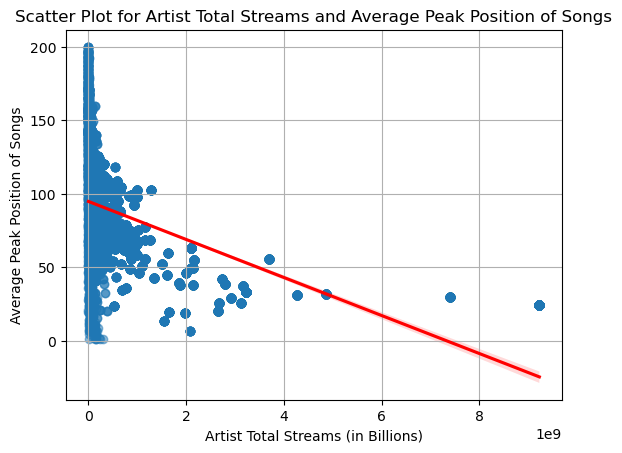

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Scatter plot for "Artist Total Streams" and "Average Peak Position of Songs"
sns.regplot(x='Artist Total Streams', y='Average Peak Position of Songs', data=topStreamedSongs_df, scatter_kws={'alpha': 0.5}, line_kws={'color': 'red'})
plt.title('Scatter Plot for Artist Total Streams and Average Peak Position of Songs')
plt.xlabel('Artist Total Streams (in Billions)')
plt.ylabel('Average Peak Position of Songs')
plt.grid(True)

# Calculate R-squared
correlation_coefficient = topStreamedSongs_df['Artist Total Streams'].corr(topStreamedSongs_df['Average Peak Position of Songs'])
r_squared = correlation_coefficient ** 2
print(f'R-squared value: {r_squared}')

# Perform Chi-square test for independence
chi2, p, _, _ = stats.chi2_contingency(pd.crosstab(topStreamedSongs_df['Artist Total Streams'], topStreamedSongs_df['Average Peak Position of Songs']))
print(f'Chi-square statistic: {chi2}')
print(f'P-value: {p}')

# Show the plot
plt.show()

In [25]:
# Group by 'Artist Name' and 'Song Name', calculate the sum of 'Total Streams' for each group, and reset the index
song_total_streams = topStreamedSongs_df.groupby(['Artist Name', 'Song Name'])['Total Streams'].sum().reset_index()

# Merge the calculated total streams back to the original DataFrame
topStreamedSongs_df = pd.merge(topStreamedSongs_df, song_total_streams, on=['Artist Name', 'Song Name'], how='left', suffixes=('', '_Song'))

# Calculate the number of times each song appears in the DataFrame
song_counts = topStreamedSongs_df['Song Name'].value_counts()

# Create a new column 'Average Total Streams of Songs' by dividing 'Total Streams' by the corresponding song count
topStreamedSongs_df['Average Total Streams of Songs'] = topStreamedSongs_df['Total Streams'] / topStreamedSongs_df['Song Name'].map(song_counts)

# Drop the extra column 'Total Streams_Song'
topStreamedSongs_df = topStreamedSongs_df.drop(columns=['Total Streams_Song'])

# Display the updated DataFrame
display(topStreamedSongs_df.head())

,Position,Artist Name,Song Name,Days,Top 10 (xTimes),Peak Position,Peak Position (xTimes),Peak Streams,Total Streams,Artist Total Streams,Artist Highest Peak Position,Average Peak Position of Songs,Average Total Streams of Songs
0,1,Post Malone,Sunflower SpiderMan: Into the SpiderVerse,1506,302,1,(x29),2118242,883369738,7400199432,1,29.971014,883369738.0
1,2,Juice WRLD,Lucid Dreams,1673,178,1,(x20),2127668,864832399,4857996474,1,31.923077,432416199.5
2,3,Lil Uzi Vert,XO TOUR Llif3,1853,212,1,(x4),1660502,781153024,2915127161,1,29.549296,781153024.0
3,4,J. Cole,No Role Modelz,2547,6,7,0,659366,734857487,2663931014,1,25.666667,734857487.0
4,5,Post Malone,rockstar,1223,186,1,(x124),2905678,718865961,7400199432,1,29.971014,718865961.0


In [26]:
# Create a new column 'Count of Top 10 Peaks' by checking if 'Peak Position' is less than or equal to 10
topStreamedSongs_df['Count of Top 10 Peaks'] = (topStreamedSongs_df['Peak Position'] <= 10).groupby(topStreamedSongs_df['Artist Name']).transform('sum')

# Display the updated DataFrame
display(topStreamedSongs_df.head())

,Position,Artist Name,Song Name,Days,Top 10 (xTimes),Peak Position,Peak Position (xTimes),Peak Streams,Total Streams,Artist Total Streams,Artist Highest Peak Position,Average Peak Position of Songs,Average Total Streams of Songs,Count of Top 10 Peaks
0,1,Post Malone,Sunflower SpiderMan: Into the SpiderVerse,1506,302,1,(x29),2118242,883369738,7400199432,1,29.971014,883369738.0,37
1,2,Juice WRLD,Lucid Dreams,1673,178,1,(x20),2127668,864832399,4857996474,1,31.923077,432416199.5,31
2,3,Lil Uzi Vert,XO TOUR Llif3,1853,212,1,(x4),1660502,781153024,2915127161,1,29.549296,781153024.0,27
3,4,J. Cole,No Role Modelz,2547,6,7,0,659366,734857487,2663931014,1,25.666667,734857487.0,33
4,5,Post Malone,rockstar,1223,186,1,(x124),2905678,718865961,7400199432,1,29.971014,718865961.0,37


In [27]:
#just done to verify code
post_malone_rows = topStreamedSongs_df[topStreamedSongs_df['Artist Name'].str.strip() == 'Post Malone']
pd.set_option('display.max_columns', None)  # Show all columns
display(post_malone_rows)
# Save the filtered DataFrame to a CSV file
post_malone_rows.to_csv('post_malone_filtered_rows.csv', index=False)

,Position,Artist Name,Song Name,Days,Top 10 (xTimes),Peak Position,Peak Position (xTimes),Peak Streams,Total Streams,Artist Total Streams,Artist Highest Peak Position,Average Peak Position of Songs,Average Total Streams of Songs,Count of Top 10 Peaks
0,1,Post Malone,Sunflower SpiderMan: Into the SpiderVerse,1506,302,1,(x29),2118242,883369738,7400199432,1,29.971014,883369738.0,37
4,5,Post Malone,rockstar,1223,186,1,(x124),2905678,718865961,7400199432,1,29.971014,718865961.0,37
11,12,Post Malone,Circles,1172,163,1,(x38),3441328,598521764,7400199432,1,29.971014,149630441.0,37
14,15,Post Malone,Congratulations,1215,136,5,0,1263208,546036924,7400199432,1,29.971014,273018462.0,37
15,16,Post Malone,I Fall Apart,1278,132,2,(x14),1275320,543144261,7400199432,1,29.971014,543144261.0,37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5920,5921,Post Malone,Patient,8,0,136,0,199976,1421750,7400199432,1,29.971014,710875.0,37
6631,6632,Post Malone,Leave,6,0,163,0,175844,960943,7400199432,1,29.971014,960943.0,37
8605,8606,Post Malone,Too Young,2,0,180,0,164875,328664,7400199432,1,29.971014,328664.0,37
9389,9390,Post Malone,Waiting For Never,1,0,176,0,266579,266579,7400199432,1,29.971014,266579.0,37


R-squared value: 0.8431073532646659
Chi-square statistic: 310352.0
P-value: 0.0


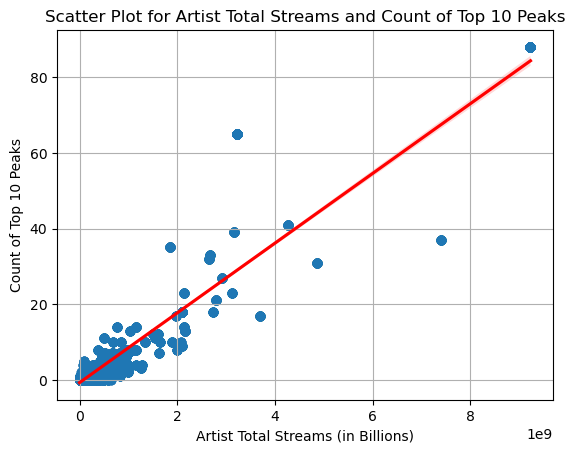

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Scatter plot for "Artist Total Streams" and "Average Peak Position of Songs"
sns.regplot(x='Artist Total Streams', y='Count of Top 10 Peaks', data=topStreamedSongs_df, scatter_kws={'alpha': 0.5}, line_kws={'color': 'red'})
plt.title('Scatter Plot for Artist Total Streams and Count of Top 10 Peaks')
plt.xlabel('Artist Total Streams (in Billions)')
plt.ylabel('Count of Top 10 Peaks')
plt.grid(True)

# Calculate R-squared
correlation_coefficient = topStreamedSongs_df['Artist Total Streams'].corr(topStreamedSongs_df['Count of Top 10 Peaks'])
r_squared = correlation_coefficient ** 2
print(f'R-squared value: {r_squared}')

# Perform Chi-square test for independence
chi2, p, _, _ = stats.chi2_contingency(pd.crosstab(topStreamedSongs_df['Artist Total Streams'], topStreamedSongs_df['Count of Top 10 Peaks']))
print(f'Chi-square statistic: {chi2}')
print(f'P-value: {p}')

# Show the plot
plt.show()

In [29]:
#proof of concept for lyric word cloud, will need to be edited to remove unnecesary words
from collections import Counter

# Combine all lyrics into a single string
all_lyrics = ' '.join(lyricgenius_df['Lyrics'].dropna())

# Tokenize the lyrics into words
words = all_lyrics.split()

# Count the frequency of each word
word_counts = Counter(words)

# Display the unique words and their counts
unique_words_counts = list(word_counts.items())
print(unique_words_counts)

[('[Swae', 85), ('Lee:]', 84), ('Ayy,', 730), ('ayy,', 638), ('ayy', 1042), ('(ooh)', 145), ('Ooh,', 1443), ('ooh,', 1314), ('ohh', 74), ('Needless', 2), ('to', 57560), ('say,', 931), ('I', 142854), ('keep', 5551), ('in', 41261), ('check', 900), ('She', 5398), ('was', 11634), ('a', 72046), ('bad-bad,', 2), ('nevertheless', 3), ('(yeah)', 851), ("Callin'", 43), ('it', 44852), ('quits', 16), ('now,', 1481), ('baby,', 2813), ("I'm", 45808), ('wreck', 85), ('(wreck)', 2), ('Crash', 22), ('at', 8477), ('my', 53877), ('place,', 125), ("you're", 6624), ("keepin'", 178), ("Thinkin'", 132), ('bad', 2556), ('way,', 857), ("losin'", 163), ('your', 25448), ('grip', 122), ("Screamin'", 16), ('face,', 400), ("don't", 22213), ('trip', 247), ('Someone', 183), ('took', 1495), ('big', 2119), ('L,', 40), ('know', 21852), ('how', 5777), ('that', 33577), ('felt', 597), ("Lookin'", 256), ('you', 87986), ('sideways,', 16), ('party', 815), ('on', 37821), ('tilt', 5), ('Ooh-ooh', 38), ('Some', 476), ('things',

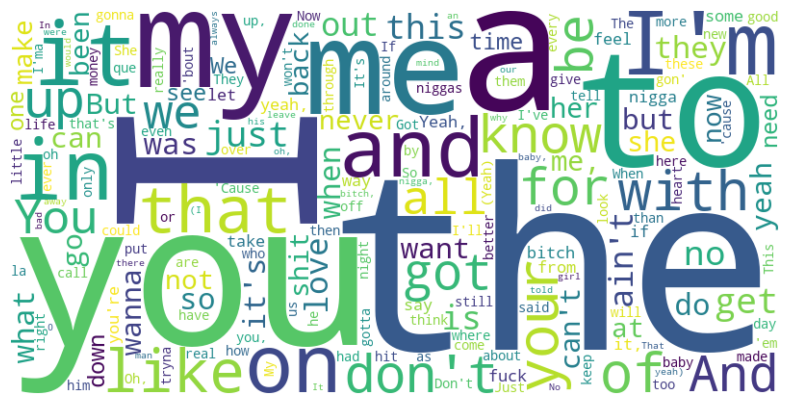

In [30]:
!pip install wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, max_words=200, background_color='white').generate_from_frequencies(word_counts)

# Display the WordCloud image
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [31]:
#I do not know where the Lowest Peak Position ia coming from
# Assuming topStreamedSongs_df is your DataFrame
# Group by 'Song Name' and calculate the maximum 'Peak Position' for each song
max_peak_position = topStreamedSongs_df.groupby('Song Name')['Peak Position'].max().reset_index()

# Merge the calculated maximum peak position back to the original DataFrame
topStreamedSongs_df = pd.merge(topStreamedSongs_df, max_peak_position, on='Song Name', how='left', suffixes=('', '_MaxPeak'))

# Rename the new column
topStreamedSongs_df = topStreamedSongs_df.rename(columns={'Peak Position_MaxPeak': 'Lowest Peak Position'})

# Display the updated DataFrame
display(topStreamedSongs_df.head())

,Position,Artist Name,Song Name,Days,Top 10 (xTimes),Peak Position,Peak Position (xTimes),Peak Streams,Total Streams,Artist Total Streams,Artist Highest Peak Position,Average Peak Position of Songs,Average Total Streams of Songs,Count of Top 10 Peaks,Lowest Peak Position
0,1,Post Malone,Sunflower SpiderMan: Into the SpiderVerse,1506,302,1,(x29),2118242,883369738,7400199432,1,29.971014,883369738.0,37,1.0
1,2,Juice WRLD,Lucid Dreams,1673,178,1,(x20),2127668,864832399,4857996474,1,31.923077,432416199.5,31,187.0
2,3,Lil Uzi Vert,XO TOUR Llif3,1853,212,1,(x4),1660502,781153024,2915127161,1,29.549296,781153024.0,27,1.0
3,4,J. Cole,No Role Modelz,2547,6,7,0,659366,734857487,2663931014,1,25.666667,734857487.0,33,7.0
4,5,Post Malone,rockstar,1223,186,1,(x124),2905678,718865961,7400199432,1,29.971014,718865961.0,37,1.0


In [32]:
# Assuming topStreamedSongs_df is your DataFrame
# Group by 'Song Name' and calculate the maximum and minimum 'Peak Position' for each song
peak_position_stats = topStreamedSongs_df.groupby('Song Name')['Peak Position'].agg(['max', 'min']).reset_index()

# Merge the calculated peak position statistics back to the original DataFrame
topStreamedSongs_df = pd.merge(topStreamedSongs_df, peak_position_stats, on='Song Name', how='left', suffixes=('', '_Stats'))

# Calculate the variance between 'Peak Position' and 'Lowest Peak Position'
topStreamedSongs_df['Peak Position Variance'] = topStreamedSongs_df['max'] - topStreamedSongs_df['min']

# Drop the unnecessary columns
topStreamedSongs_df = topStreamedSongs_df.drop(['max', 'min'], axis=1)

# Display the updated DataFrame
display(topStreamedSongs_df.head())

,Position,Artist Name,Song Name,Days,Top 10 (xTimes),Peak Position,Peak Position (xTimes),Peak Streams,Total Streams,Artist Total Streams,Artist Highest Peak Position,Average Peak Position of Songs,Average Total Streams of Songs,Count of Top 10 Peaks,Lowest Peak Position,Peak Position Variance
0,1,Post Malone,Sunflower SpiderMan: Into the SpiderVerse,1506,302,1,(x29),2118242,883369738,7400199432,1,29.971014,883369738.0,37,1.0,0.0
1,2,Juice WRLD,Lucid Dreams,1673,178,1,(x20),2127668,864832399,4857996474,1,31.923077,432416199.5,31,187.0,186.0
2,3,Lil Uzi Vert,XO TOUR Llif3,1853,212,1,(x4),1660502,781153024,2915127161,1,29.549296,781153024.0,27,1.0,0.0
3,4,J. Cole,No Role Modelz,2547,6,7,0,659366,734857487,2663931014,1,25.666667,734857487.0,33,7.0,0.0
4,5,Post Malone,rockstar,1223,186,1,(x124),2905678,718865961,7400199432,1,29.971014,718865961.0,37,1.0,0.0


In [33]:
# Assuming topStreamedSongs_df is your DataFrame
# Calculate the sum of 'Total Streams' for each 'Artist Name'
artist_total_streams = topStreamedSongs_df.groupby('Artist Name')['Total Streams'].sum().reset_index()

# Merge the artist total streams back to the original DataFrame
topStreamedSongs_df = pd.merge(topStreamedSongs_df, artist_total_streams, on='Artist Name', how='left', suffixes=('', '_Artist'))

# Calculate the 'Percentage of Artist Total Streams' for each song
topStreamedSongs_df['Percentage of Artist Total Streams'] = (topStreamedSongs_df['Total Streams'] / topStreamedSongs_df['Total Streams_Artist']) * 100

# Display the updated DataFrame
display(topStreamedSongs_df.head())

,Position,Artist Name,Song Name,Days,Top 10 (xTimes),Peak Position,Peak Position (xTimes),Peak Streams,Total Streams,Artist Total Streams,Artist Highest Peak Position,Average Peak Position of Songs,Average Total Streams of Songs,Count of Top 10 Peaks,Lowest Peak Position,Peak Position Variance,Total Streams_Artist,Percentage of Artist Total Streams
0,1,Post Malone,Sunflower SpiderMan: Into the SpiderVerse,1506,302,1,(x29),2118242,883369738,7400199432,1,29.971014,883369738.0,37,1.0,0.0,7400199432,11.937107
1,2,Juice WRLD,Lucid Dreams,1673,178,1,(x20),2127668,864832399,4857996474,1,31.923077,432416199.5,31,187.0,186.0,4857996474,17.802244
2,3,Lil Uzi Vert,XO TOUR Llif3,1853,212,1,(x4),1660502,781153024,2915127161,1,29.549296,781153024.0,27,1.0,0.0,2915127161,26.796533
3,4,J. Cole,No Role Modelz,2547,6,7,0,659366,734857487,2663931014,1,25.666667,734857487.0,33,7.0,0.0,2663931014,27.585455
4,5,Post Malone,rockstar,1223,186,1,(x124),2905678,718865961,7400199432,1,29.971014,718865961.0,37,1.0,0.0,7400199432,9.714143
